# Worksheet 04

Name:  Truc Duong
UID: U40568683

### Topics

- Distance & Similarity

### Distance & Similarity

#### Part 1

a) In the minkowski distance, describe what the parameters p and d are.


1. **p:** The \(p\) parameter in Minkowski distance determines the order of the distance metric. It is a non-negative real number. When \(p = 1\), it corresponds to Manhattan distance, and when \(p = 2\), it corresponds to Euclidean distance. Generally, \(p\) can take any positive real value, which leads to different variations of Minkowski distance.
2. **d:** \(d\)  refers to the number of dimensions in the space in which you are measuring the distance. For example, in a 2-dimensional space (like the Cartesian plane), \(d = 2\). In a 3-dimensional space, \(d = 3\), and so on.


b) In your own words describe the difference between the Euclidean distance and the Manhattan distance.

- Euclidean distance between 2 points is the length of the  straight line between them.
- Manhattan distance between 2 points is how far away they are when you can only move in straight lines, in on a grid.

Consider A = (0, 0) and B = (1, 1). When:

- p = 1, d(A, B) = 2
- p = 2, d(A, B) = $\sqrt{2} = 1.41$
- p = 3, d(A, B) = $2^{1/3} = 1.26$
- p = 4, d(A, B) = $2^{1/4} = 1.19$

c) Describe what you think distance would look like when p is very large.


When \(p\) is extremely large, the Minkowski distance will primarily be determined by the maximum absolute difference in any dimension:


In this specific case of A(0, 0) and B(1, 1), no matter how large \(p\) is, the maximum absolute difference in any dimension will always be \(1\). Therefore, for extremely large values of \(p\), the Minkowski distance will approach \(1\).


d) Is the minkowski distance still a distance function when p < 1? Expain why / why not.

No. One counter example is the below case, where the triangle inequality is violated.
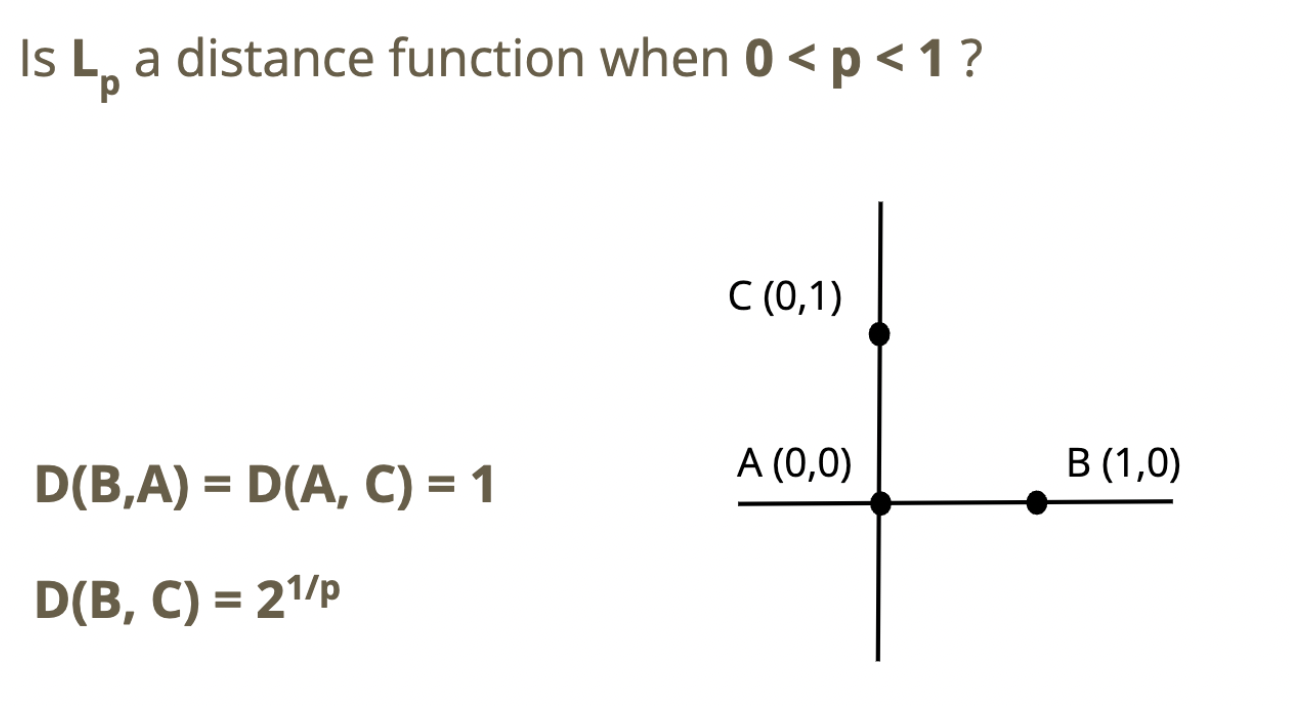

e) when would you use cosine similarity over the euclidan distance?

- when we want to see if the 2 objects are similar in direction
- 2 proportional vectors have cosine similarity of 1
- 2 orthogonal vectors have cosine similarity of 0
- 2 opposite vectors have cosine similarity of -1
- We use cosine similarity over euclidean distance when we are more interested in the angle, rather than the euclidean distance.
-> When direction matters more than magnitude

f) what does the jaccard distance account for that the manhattan distance doesn't?

- Jiccard similarity accounts for the size of the intersection.


#### Part 2

Consider the following two sentences:

In [44]:
s1 = "hello my name is Alice"  
s2 = "hello my name is Bob"

using the union of words from both sentences, we can represent each sentence as a vector. Each element of the vector represents the presence or absence of the word at that index.

In this example, the union of words is ("hello", "my", "name", "is", "Alice", "Bob") so we can represent the above sentences as such:

In [45]:
v1 = [1,    1, 1,   1, 1,    0]
#     hello my name is Alice
v2 = [1,    1, 1,   1, 0, 1]
#     hello my name is    Bob

Programmatically, we can do the following:

In [46]:
corpus = [s1, s2]
all_words = list(set([item for x in corpus for item in x.split()]))
print(all_words)
v1 = [1 if x in s1 else 0 for x in all_words]
print(v1)

['name', 'is', 'my', 'Bob', 'Alice', 'hello']
[1, 1, 1, 0, 1, 1]


Let's add a new sentence to our corpus:

In [47]:
s3 = "hi my name is Claude"
corpus.append(s3)

a) What is the new union of words used to represent s1, s2, and s3?

In [48]:
new_union = list(set([item for x in corpus for item in x.split()]))
print(new_union)

['name', 'is', 'my', 'Bob', 'Claude', 'hi', 'Alice', 'hello']


b) Represent s1, s2, and s3 as vectors as above, using this new set of words.

In [49]:
v1 = [1 if x in s1 else 0 for x in new_union]
v2 = [1 if x in s2 else 0 for x in new_union]
v3 = [1 if x in s3 else 0 for x in new_union]
print(v1)
print(v2)
print(v3)

[1, 1, 1, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 1]
[1, 1, 1, 0, 1, 1, 0, 0]


c) Write a function that computes the manhattan distance between two vectors. Which pair of vectors are the most similar under that distance function?

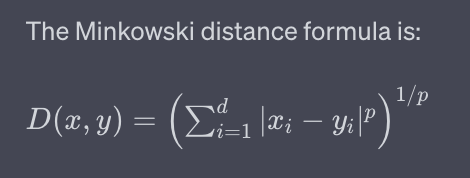

In [50]:
def minkowski_dist(x, y, p):
    if p < 1:
        raise ValueError("p must be greater than 1")
    if len(x) != len(y):
        raise ValueError("x and y are not in the same dimensional space")
    res = 0
    for i in range(len(x)):
        res += abs(x[i] - y[i])**p
    return res**(1/p)

def manhattan_dist(x,y):
    return minkowski_dist(x,y,1)

print(manhattan_dist(v1,v2))

2.0


d) Create a matrix of all these vectors (row major) and add the following sentences in vector form:

- "hi Alice"
- "hello Claude"
- "Bob my name is Claude"
- "hi Claude my name is Alice"
- "hello Bob"

In [51]:
# find the union of all the words to find the dimensional space
corpus = ["hi Alice", "hello Claude", "Bob my name is Claude", "hi Claude my name is Alice", "hello Bob"]
all_words = list(set([w for s in corpus for w in s.split()]))
print(all_words)
matrix = [[1 if w in sentence else 0 for w in all_words] for sentence in corpus ]
for vector in matrix:
    print(vector)

['name', 'is', 'my', 'Bob', 'Claude', 'hi', 'Alice', 'hello']
[0, 0, 0, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 0, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 1]


e) How many rows and columns does this matrix have?

In [52]:
rows = len(matrix)
cols = len(matrix[0])

f) When using the Manhattan distance, which two sentences are the most similar?

In [53]:
minimum  = manhattan_dist(matrix[0], matrix[1])
pair = [0,1]
for i in range(len(matrix)):
    for j in range(i+1,len(matrix)):
        new_min = manhattan_dist(matrix[i], matrix[j])
        if new_min < minimum:
            minimum = new_min
            pair = [i,j]

print(pair)
            

[1, 4]
